In [1]:
import pandas as pd
import os
#loading and joining the tables based on the first colum "numero_boletim" or"num_boletim"
def load_and_concatenate_csvs(directory_path, delimiter=';'):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        try:
            df = pd.read_csv(file_path, encoding='utf-8', delimiter=delimiter, on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='latin1', delimiter=delimiter, on_bad_lines='skip')
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)


si_bol_path = './si-bol'
si_env_path = './si-env'
si_veic_path = './si-veic'
si_log_path = './si-log'
pd.options.display.max_columns = None

df_si_bol = load_and_concatenate_csvs(si_bol_path)
df_si_env = load_and_concatenate_csvs(si_env_path)
df_si_veic = load_and_concatenate_csvs(si_veic_path)
df_si_log = load_and_concatenate_csvs(si_log_path)



print("si-bol DataFrame shape:", df_si_bol.shape)
print("si-env DataFrame shape:", df_si_env.shape)
print("si-veic DataFrame shape:", df_si_veic.shape)
print("si-log DataFrame shape:", df_si_log.shape)


df_si_env.rename(columns={'num_boletim': 'numero_boletim'}, inplace=True)

joined_df = df_si_bol.merge(df_si_env, on="numero_boletim", how="outer")
joined_df = joined_df.merge(df_si_veic, on="numero_boletim", how="outer" )
joined_df = joined_df.merge(df_si_log, on="numero_boletim", how="outer")

joined_df.drop_duplicates().dropna().head()



C:\Users\avela\AppData\Local\Temp\ipykernel_5288\584791284.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:


columns_to_be_dropped=["data_inclusao","desc_tipo_acidente",
                       "cod_tempo","pavimento","desc_regional",
                       "velocidade_permitida","origem_boletim",
                       "cod_pavimento","local_sinalizado",
                       "data_alteracao","valor_ups_antiga","cod_severidade_antiga",
                        "valor_ups","descricao_ups","data_alteracao_smsa","descricao_ups_antiga"
                        "desc_severidade","descricao_habilitacao","codigo_situacao",
                        "cod_tipo_socoro", "data_hora_boletim","nome_municipio",
                        "numero_imovel_proximo","numero_imovel","descricao_tipo_bairro",
                        "tipo_bairro","Numero_bairro","sequencia_logradouros","numero_logradouro",
                        "nome_logradouro","tipo_logradouo_anterior","nome_logradoro_anterior"
                        "cod_tipo_socorro","coordenada_x","coordenada_y","descrição_categoria",
                        "cod_especie","tipo_logradouro_anterior"
                        "descricao_ups_antiga","hora_informada","nascimento",
                        "descricao_categoria","numero_municipio","nome_logradoro_anterior","data_boletim",
                        "data_hora_boletim_y","data_hora_boletim_x","descricao_ups_antiga","cod_regional",
                        "tipo_logradouro_anterior","codigo_especie","codigo_categoria","tipo_socorro",
                        "codigo_severidade","declaracao_obito","sequencial_veiculo","numero_envolvido",
                        "desc_tempo","Embreagues","cinto_seguranca","indicador_fatalidade","especie_veiculo"
                       ]
full_df = joined_df
joined_df = joined_df.drop(columns=columns_to_be_dropped, errors='ignore')

joined_df =joined_df.drop_duplicates()
display(joined_df.head())

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro
0,90,31/12/2012 21:51,H02002,SIM,NAO FATAL,M,49,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
1,90,31/12/2012 21:51,H02002,NÃO,NAO FATAL,F,46,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
2,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...
3,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...
4,132,31/12/2014 22:30,H08002,SIM,NAO FATAL,M,24,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...


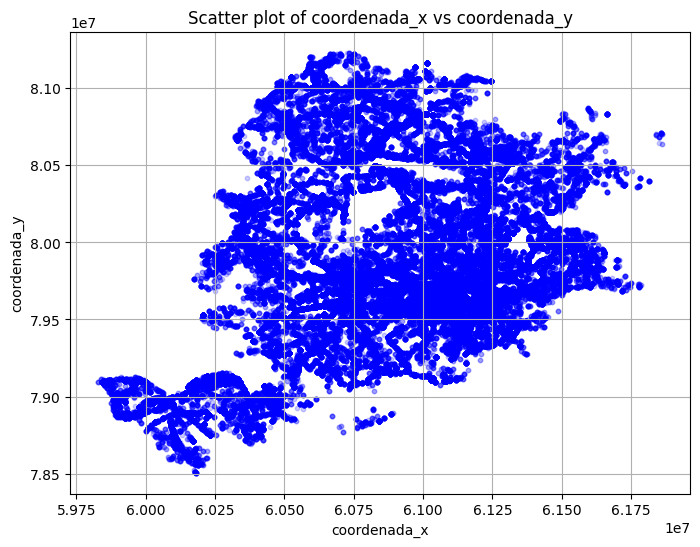

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming joined_df is your large DataFrame containing coordenada_x and coordenada_y columns
# Example DataFrame (replace this with your actual DataFrame)


filtered_df = full_df[(full_df['coordenada_x'] > 0) & (full_df['coordenada_y'] > 0)]

plt.figure(figsize=(8, 6))  # Optional: set the figure size
plt.scatter(filtered_df['coordenada_x'], filtered_df['coordenada_y'], marker='o', color='b',s=10, alpha=0.2)
plt.title('Scatter plot of coordenada_x vs coordenada_y')
plt.xlabel('coordenada_x')
plt.ylabel('coordenada_y')
plt.grid(True)
plt.show()


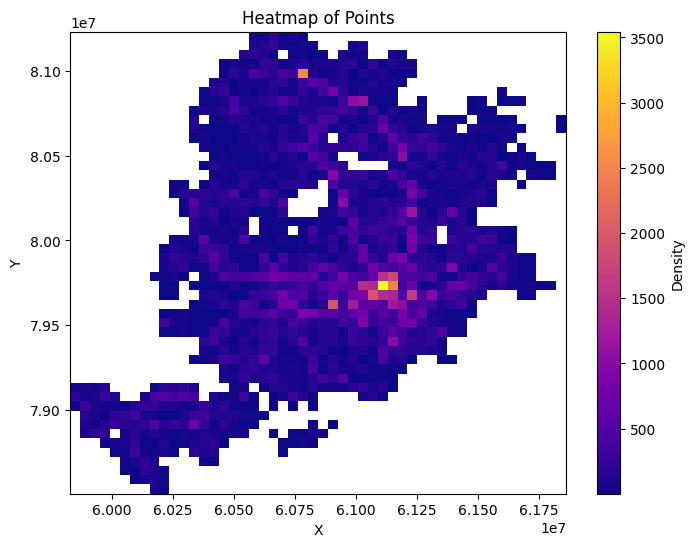

In [ ]:

# Create 2D histogram (heatmap)
import numpy as np
plt.figure(figsize=(8, 6))

hist, xedges, yedges, _ = plt.hist2d(filtered_df['coordenada_x'], filtered_df['coordenada_y'], bins=50, cmap='plasma', cmin=1)
plt.colorbar(label='Density')
plt.title('Heatmap of Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## Clustering


In [ ]:
#binning hour of day and age
clustering_df = joined_df

clustering_df['data hora_boletim'] = pd.to_datetime(clustering_df['data hora_boletim'], format='%d/%m/%Y %H:%M')
clustering_df['hour'] = clustering_df['data hora_boletim'].dt.hour

#hour binning
morning_hours = range(6, 12)  
afternoon_hours = range(12, 18)  
night_hours = list(range(0, 6)) + list(range(18, 24)) 


clustering_df['morning'] = clustering_df['hour'].apply(lambda x: True if x in morning_hours else False)
clustering_df['afternoon'] = clustering_df['hour'].apply(lambda x: True if x in afternoon_hours else False)
clustering_df['night'] = clustering_df['hour'].apply(lambda x: True if x in night_hours else False)

clustering_df.drop(columns=['hour','data hora_boletim'], inplace=True)



In [ ]:
#age binning

children = range(0,16)
young_adult = range(17,30)
middle_aged = range(31,45)
old_aged = range(45,200)

clustering_df['Idade'] =clustering_df['Idade'].astype('int')
clustering_df['children'] = clustering_df['Idade'].apply(lambda x: True if x in children else False)
clustering_df['young_adult'] = clustering_df['Idade'].apply(lambda x: True if x in young_adult else False)
clustering_df['middle_aged'] = clustering_df['Idade'].apply(lambda x: True if x in middle_aged else False)
clustering_df['old_aged'] = clustering_df['Idade'].apply(lambda x: True if x in old_aged else False)

clustering_df.drop(columns=['Idade'], inplace=True)
clustering_df.head()

,numero_boletim,tipo_acidente,condutor,desc_severidade,sexo,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged
0,90,H02002,SIM,NAO FATAL,M,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
1,90,H02002,NÃO,NAO FATAL,F,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
2,132,H08002,SIM,SEM FERIMENTOS,M,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
3,132,H08002,SIM,SEM FERIMENTOS,M,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
4,132,H08002,SIM,NAO FATAL,M,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,True,False,False


In [ ]:
#prepping "descricao_veiculo" for one hot encoding

#grouping "tipos de caminhão"
trucks_to_be_grouped =["CAMINHAO-TRATOR","CAMIONETA","REBOQUE E SEMI-REBOQUE","REBOQUE E SEMI-REBOQUE"]
for i in trucks_to_be_grouped:
    clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace(i,"CAMINHAO")

#grouping "microoonibus"
clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace("MICROONIBUS","CAMINHAO")

#grouping "motoneta"
clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace("MOTONETA","MOTOCICLETA")

#grouping "other vehicles"
other_vehicles =["CARRO DE MAO","CARROCA","CICLOMOTOR","ESPECIAL","MISTO","NAO INFORMADO",
                 "TRACAO","TRATOR DE RODAS","TRATOR MISTO","TREM","TRICICLO","CHARRETE"]
for i in other_vehicles:
    clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace(i,"OUTROS TIPOS DE VEICULOS")
#One hot encoding categorical data

vehicles_one_hot = pd.get_dummies(clustering_df['descricao_especie'])
true_counts = vehicles_one_hot.sum()
print(true_counts)
clustering_df.drop(columns=['descricao_especie'],inplace=True)

AUTOMOVEL                   91339
BICICLETA                    2748
CAMINHAO                    11157
MOTOCICLETA                 68769
ONIBUS                      18764
OUTROS TIPOS DE VEICULOS     3813
dtype: int64


In [ ]:
#prepping "descricao_tipo_socorro"
clustering_df['descricao_tipo_socorro'] = clustering_df['descricao_tipo_socorro'].apply(lambda x: "socorro:"+ str(x))
descricao_tipo_socorro_one_hot = pd.get_dummies(clustering_df['descricao_tipo_socorro'])
true_counts = descricao_tipo_socorro_one_hot.sum()
# print(true_counts)
descricao_tipo_socorro_one_hot.head()
clustering_df.drop(columns=['descricao_tipo_socorro'],inplace=True)

In [ ]:
#prepping "descricao_severidade"
clustering_df['desc_severidade'] = clustering_df['desc_severidade'].apply(lambda x: "fatalidade:"+ str(x))
desc_severidade_one_hot = pd.get_dummies(clustering_df['desc_severidade'])
true_counts = desc_severidade_one_hot.sum()
desc_severidade_one_hot.head()
clustering_df.drop(columns=['desc_severidade'],inplace=True)
print(true_counts)

fatalidade:FATAL                 823
fatalidade:NAO FATAL          103480
fatalidade:NAO INFORMADO       11651
fatalidade:SEM FERIMENTOS      80641
dtype: int64


In [ ]:
#prepping "descricao_situação"
clustering_df['descricao_situacao'] = clustering_df['descricao_situacao'].str.strip().replace("NÃO INFORMADO","MOVIMENTO NAO INFORMADO")
clustering_df['descricao_situacao'] = clustering_df['descricao_situacao'].str.strip().replace("","MOVIMENTO NAO INFORMADO")
descricao_situacao_one_hot = pd.get_dummies(clustering_df['descricao_situacao'])
true_counts = descricao_situacao_one_hot.sum()
descricao_situacao_one_hot.head()
print(true_counts)
clustering_df.drop(columns=['descricao_situacao'],inplace=True)

EM MOVIMENTO               177435
MOVIMENTO NAO INFORMADO      5516
PARADO                      13639
dtype: int64


In [ ]:
#prepping "condutor"
clustering_df['condutor'] = clustering_df['condutor'].apply(lambda x: "condutor:"+ str(x))
condutor_one_hot = pd.get_dummies(clustering_df['condutor'])
true_counts = condutor_one_hot.sum()
condutor_one_hot.head()
clustering_df.drop(columns=['condutor'],inplace=True)
print(true_counts)

condutor:NÃO               34254
condutor:NÃO INFORMADO       244
condutor:SIM              162097
dtype: int64


In [ ]:
#prepping "tipo_logradouo"
to_be_replace =["TRV","TUN","VDP","VDT","VIA"
                ,"BEC","ELP","EST","NI","ALA"]
for r in to_be_replace:
    clustering_df['tipo_logradouro'] = clustering_df['tipo_logradouro'].str.strip().replace(r,"OUTROS_LOCAIS")
logradouro_one_hot = pd.get_dummies(clustering_df['tipo_logradouro'])
true_counts = logradouro_one_hot.sum()
logradouro_one_hot.head()
# clustering_df.drop(columns=['tipo_logradouro'],inplace=True)
print(true_counts)

AVE              87675
OUTROS_LOCAIS     2536
PCA               2064
ROD              14637
RUA              89533
dtype: int64


In [ ]:
#prepping "sexo"
clustering_df['sexo'] = clustering_df['sexo'].str.strip().replace("0","sexo nao informado")
sexo_one_hot = pd.get_dummies(clustering_df['sexo'])
true_counts = sexo_one_hot.sum()
sexo_one_hot.head()
print(true_counts)
clustering_df.drop(columns="sexo",inplace=True)

F                      43226
M                     142391
sexo nao informado     10978
dtype: int64


In [ ]:
#encoding "tipo de acidente"
tipo_acidente_one_hot = pd.get_dummies(clustering_df['tipo_acidente'])
true_counts = tipo_acidente_one_hot.sum()
tipo_acidente_one_hot.head()

print(true_counts)
clustering_df.drop(columns="tipo_acidente",inplace=True)

H01002    97329
H02002     5154
H03002      940
H04000     7638
H05002       97
H06001      524
H06002    17766
H07002      182
H08002    32017
H09002    32097
H99002     2851
dtype: int64


In [ ]:
# Joining all one hot encoded dfs
clustering_df.drop(columns=["numero_boletim","categoria_habilitacao","tipo_logradouro"],inplace=True)
concat_dfs= pd.concat([clustering_df.reset_index(drop=True),condutor_one_hot.reset_index(drop=True)
                       ,descricao_situacao_one_hot.reset_index(drop=True),
                       
                       descricao_tipo_socorro_one_hot.reset_index(drop=True),
                       vehicles_one_hot.reset_index(drop=True),
                        logradouro_one_hot.reset_index(drop=True),
                         sexo_one_hot.reset_index(drop=True),
                         tipo_acidente_one_hot.reset_index(drop=True),
                         desc_severidade_one_hot.reset_index(drop=True  )],axis=1)
display(concat_dfs.head())
# display(descricao_situacao_one_hot)

,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:NÃO INFORMADO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,socorro:nan,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS,AVE,OUTROS_LOCAIS,PCA,ROD,RUA,F,M,sexo nao informado,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
0,JARDIM ALVORADA ...,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,JARDIM ALVORADA ...,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,BAIRRO MADRE GERTRUDES ...,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [ ]:
grouped = concat_dfs.groupby('nome_bairro').sum()
grouped_sorted = grouped.sort_values(by='night', ascending=False)
grouped_sorted.reset_index(inplace=True)
grouped_sorted = grouped_sorted.drop(index=0)
grouped_sorted["nome_bairro"]=grouped_sorted["nome_bairro"].str.rstrip()


#dropping colluimns with very small numbers

to_be_dropped =["condutor:NÃO INFORMADO","socorro:nan"]

grouped_sorted.drop(columns=to_be_dropped,inplace=True)
display(grouped_sorted.head())

,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS,AVE,OUTROS_LOCAIS,PCA,ROD,RUA,F,M,sexo nao informado,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
1,CENTRO,3050,3838,2860,865,2805,3198,2526,2836,6898,8775,193,778,2678,4608,107,741,1612,3617,42,335,3036,2508,208,5168,279,301,0,4000,2475,6728,545,3441,179,31,1029,0,38,2493,5,1406,891,235,30,5182,571,3965
2,SANTA EFIGENIA,1366,1441,1094,339,1199,1200,1029,833,3065,3425,125,351,929,1995,94,285,598,1746,50,134,1254,632,85,2526,112,108,0,1155,1040,2665,196,1657,79,27,347,0,6,400,2,819,476,88,6,2051,223,1621
3,PADRE EUSTAQUIO,834,1025,845,252,822,878,655,523,2178,2432,81,191,734,1510,17,91,352,1358,36,232,798,243,37,671,3,36,274,1720,662,1901,141,1418,56,3,116,2,10,241,1,427,410,20,9,1408,151,1136
4,VENDA NOVA,758,1001,757,288,846,813,490,491,2023,2198,69,249,599,1361,46,108,402,1059,30,132,908,343,44,1263,2,0,14,1237,591,1771,154,1088,65,11,116,0,2,269,6,525,394,40,7,1294,157,1058
5,SAO FRANCISCO,709,847,733,254,795,763,409,373,1910,1991,59,239,621,1332,26,27,283,1057,12,258,764,154,44,1034,0,6,925,324,422,1703,164,815,72,12,63,4,17,176,4,569,535,22,23,1138,164,964


### Start of clustering

In [ ]:
##normalizing attributes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
first_column = grouped_sorted.iloc[:, 0]
df_normalized = pd.DataFrame(scaler.fit_transform(grouped_sorted.iloc[:, 1:]), columns=grouped_sorted.columns[1:])

# Concatenate the first column back with the normalized columns
df_normalized = pd.concat([first_column, df_normalized], axis=1)
df_normalized= df_normalized.dropna()
display(df_normalized)

,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS,AVE,OUTROS_LOCAIS,PCA,ROD,RUA,F,M,sexo nao informado,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
1,CENTRO,5.686758,5.036836,4.542987,4.772632,4.881545,4.958731,5.735770,4.701286,5.196609,5.039531,6.219399,5.452689,4.633635,5.055194,8.439308,6.515089,4.871334,5.355100,5.056500,2.917275,4.931075,4.466620,5.324322,6.013453,4.101786,6.102525,-0.294431,3.396374,5.799984,4.933211,4.525077,5.116388,3.880380,6.505831,5.957893,-0.171880,1.471570,2.836046,1.798558,6.037534,4.109111,5.573519,1.260574,5.127884,4.909725,5.193366
2,SANTA EFIGENIA,3.264671,3.431854,3.375040,3.396263,3.156364,3.488343,3.473564,2.799597,3.523043,3.418178,3.808253,2.753066,3.549833,3.686409,1.041842,1.887387,2.640896,4.032955,3.472419,5.472510,2.925137,1.554354,2.024946,1.260165,-0.066603,1.904546,2.229839,5.322315,3.512969,3.356134,3.100046,4.291152,2.575291,0.259038,1.827522,1.602092,2.681239,1.597712,0.697830,2.888295,3.448985,0.949013,2.148641,3.347125,3.143998,3.476494
3,PADRE EUSTAQUIO,2.918658,3.339258,2.962272,3.965795,3.266190,3.191526,2.475531,2.603294,3.230594,3.036107,3.150668,3.731679,2.799509,3.265895,3.827901,2.292907,3.094237,3.014086,2.793527,2.865127,3.409026,2.303008,2.506105,2.777117,-0.104846,-0.194444,-0.165453,3.675891,3.083398,3.087783,3.436871,3.151704,3.085978,2.341302,1.827522,-0.171880,0.261902,1.815783,6.201471,3.675605,3.288954,2.309162,1.556596,3.031407,3.291142,3.200379
4,VENDA NOVA,2.695571,2.745106,2.849699,3.427903,3.032810,2.963204,1.985588,1.879425,3.017389,2.698121,2.602680,3.562953,2.921784,3.184051,1.906481,0.360722,2.015285,3.007271,0.756851,6.150429,2.775572,0.888051,2.506105,2.190323,-0.181330,0.155388,8.227283,0.563707,2.060896,2.947415,3.695968,2.209070,3.483179,2.601585,0.879861,3.376063,4.798159,1.091475,4.000015,4.029091,4.699224,1.085028,6.292955,2.599372,3.462810,2.867624
5,SAO FRANCISCO,1.279652,2.270556,2.671458,2.225558,2.172508,1.858130,2.221487,1.100347,2.364566,1.968268,2.164290,3.276118,2.121438,2.492603,2.098623,0.289160,1.271806,2.148558,4.830203,7.010866,1.807794,0.393939,2.299894,0.324882,-0.181330,0.271998,5.905692,2.288532,1.280407,2.321951,2.659582,2.157277,2.348319,0.259038,0.218286,3.376063,1.169153,0.631967,1.798558,2.390201,3.649023,0.472961,0.668529,1.967936,2.457327,2.216275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,FILADELFIA,-0.532361,-0.515014,-0.588473,-0.590462,-0.600593,-0.516410,-0.488322,-0.402601,-0.584457,-0.549482,-0.630448,-0.469608,-0.518592,-0.575169,-0.591365,-0.283339,-0.550625,-0.587736,-0.600933,-0.576618,-0.585255,-0.264877,-0.518323,-0.459219,-0.181330,-0.194444,-0.294431,-0.533909,-0.492333,-0.563853,-0.553214,-0.605021,-0.602318,-0.521811,-0.246604,-0.171880,-0.342932,-0.263683,-0.402898,-0.542126,-0.651799,-0.411136,-0.515561,-0.546729,-0.559123,-0.544880
414,VILA MINASLANDIA,-0.532361,-0.484149,-0.588473,-0.574642,-0.586865,-0.520976,-0.458079,-0.402601,-0.569362,-0.536420,-0.630448,-0.469608,-0.529708,-0.552591,-0.399223,-0.283339,-0.550625,-0.574105,-0.600933,-0.576618,-0.567659,-0.264877,-0.518323,-0.459219,0.048123,-0.194444,-0.294431,-0.527091,-0.492333,-0.549403,-0.527305,-0.577398,-0.602318,-0.521811,-0.246604,-0.171880,-0.342932,-0.263683,-0.402898,-0.542126,-0.651799,-0.411136,-0.515561,-0.538420,-0.534599,-0.530720
415,BERNADETE,-0.532361,-0.515014,-0.588473,-0.590462,-0.600593,-0.520976,-0.482274,-0.402601,-0.584457,-0.549482,-0.630448,-0.469608,-0.529708,-0.569525,

[1.86400568e+01 1.72547616e+01 2.32957668e+01 ... 1.13832702e-01
 2.22366664e-02 1.11923790e-01]


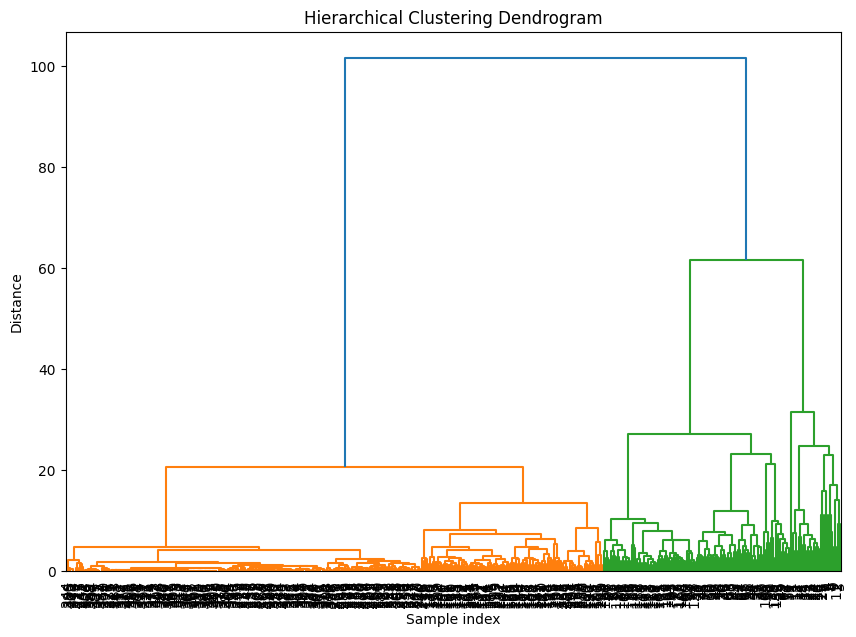

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

distance_matrix = pdist(df_normalized.iloc[:, 1:], metric='euclidean')
print(distance_matrix)

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_normalized.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

Index(['morning', 'afternoon', 'night', 'children', 'young_adult',
       'middle_aged', 'old_aged', 'condutor:NÃO', 'condutor:SIM',
       'EM MOVIMENTO', 'MOVIMENTO NAO INFORMADO', 'PARADO',
       'socorro:AMBULANCIA          ', 'socorro:NÃO INFORMADO       ',
       'socorro:TERCEIROS           ', 'socorro:VEICULO ENVOLVIDO   ',
       'socorro:VIATURA PMMG        ', 'AUTOMOVEL', 'BICICLETA', 'CAMINHAO',
       'MOTOCICLETA', 'ONIBUS', 'OUTROS TIPOS DE VEICULOS', 'AVE',
       'OUTROS_LOCAIS', 'PCA', 'ROD', 'RUA', 'F', 'M', 'sexo nao informado',
       ' H01002', ' H02002', ' H03002', ' H04000', ' H05002', ' H06001',
       ' H06002', ' H07002', ' H08002', ' H09002', ' H99002',
       'fatalidade:FATAL          ', 'fatalidade:NAO FATAL      ',
       'fatalidade:NAO INFORMADO  ', 'fatalidade:SEM FERIMENTOS '],
      dtype='object')


Text(0, 0.5, 'BICICLETA')

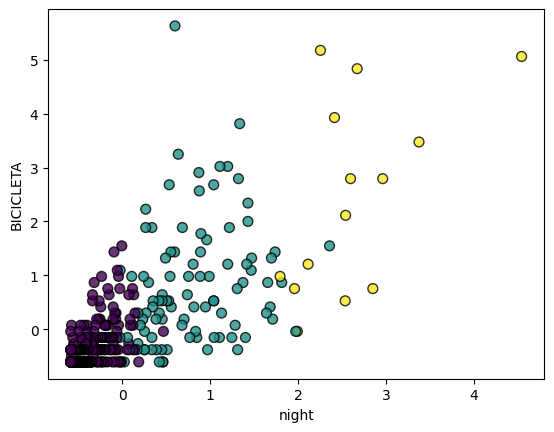

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = df_normalized.iloc[:, 1:] 
y = df_normalized.iloc[:, 0]   

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict clusters
labels = kmeans.predict(X)
labels_df = pd.DataFrame(labels)
clusters = pd.concat([y, labels_df], axis=1)
clusters =clusters.dropna()
print(X.columns)

feature1="night"
feature2="BICICLETA"
plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis', s=50, alpha=0.8, edgecolors='k')

# # Plot centroids
# plt.title('KNN Clustering with K=3')
plt.xlabel(feature1)
plt.ylabel(feature2)
# plt.colorbar(label='Cluster')
# plt.show()
# clusters.rename(columns={0: 'labels'}, inplace=True)
# display(clusters)
# unique_labels, label_counts = np.unique(labels, return_counts=True)
# for label, count in zip(unique_labels, label_counts):
#     print(f'Cluster {label}: {count} points')

In [ ]:
#print means of each attribute of labeled data

df_labeled = df_normalized.join(clusters.set_index('nome_bairro'), on='nome_bairro')
df_labeled = df_labeled.rename(columns = {0: "Cluster"})

means = df_labeled.groupby("Cluster").mean(numeric_only=True)

std_dev = means.std(numeric_only=True).sort_values(ascending=False)
print(std_dev)



 H09002                         1.775379
CAMINHAO                        1.725174
 H08002                         1.647325
AUTOMOVEL                       1.566864
young_adult                     1.562557
night                           1.545868
 H02002                         1.540963
socorro:NÃO INFORMADO           1.536362
PARADO                          1.535101
condutor:SIM                    1.531924
 H01002                         1.521935
M                               1.478847
fatalidade:SEM FERIMENTOS       1.471202
socorro:TERCEIROS               1.471087
MOVIMENTO NAO INFORMADO         1.469466
MOTOCICLETA                     1.464986
fatalidade:NAO FATAL            1.436336
EM MOVIMENTO                    1.430387
middle_aged                     1.425208
children                        1.419079
socorro:AMBULANCIA              1.413012
 H03002                         1.405049
BICICLETA                       1.387876
afternoon                       1.386744
morning         

In [ ]:
index = std_dev.index[:5]
df_reduced = df_normalized[['nome_bairro'] + list(index)]
df_reduced

,nome_bairro,H09002,CAMINHAO,H08002,AUTOMOVEL,young_adult
1,CENTRO,4.109111,2.917275,6.037534,5.355100,4.881545
2,SANTA EFIGENIA,3.448985,5.472510,2.888295,4.032955,3.156364
3,PADRE EUSTAQUIO,3.288954,2.865127,3.675605,3.014086,3.266190
4,VENDA NOVA,4.699224,6.150429,4.029091,3.007271,3.032810
5,SAO FRANCISCO,3.649023,7.010866,2.390201,2.148558,2.172508
...,...,...,...,...,...,...
413,FILADELFIA,-0.651799,-0.576618,-0.542126,-0.587736,-0.600593
414,VILA MINASLANDIA,-0.651799,-0.576618,-0.542126,-0.574105,-0.586865
415,BERNADETE,-0.651799,-0.576618,-0.542126,-0.587736,-0.600593
416,ACABA MUNDO,-0.651799,-0.576618,-0.493923,-0.584328,-0.605170


Index([' H09002', 'CAMINHAO', ' H08002', 'AUTOMOVEL', 'young_adult'], dtype='object')


Text(0, 0.5, 'AUTOMOVEL')

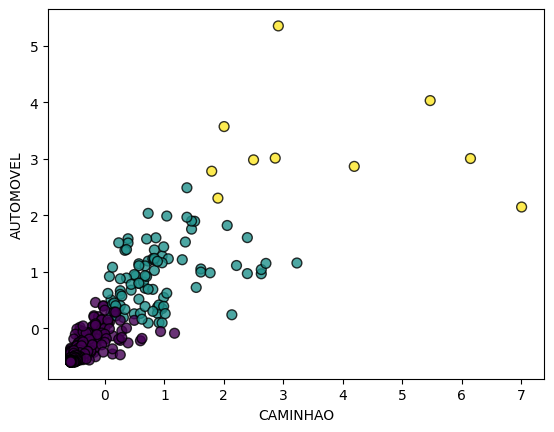

In [ ]:
#Refazer processo de clusterização, utilizando as colunas com maior desvio entre as medias de cada cluster

X = df_reduced.iloc[:, 1:] 
y = df_reduced.iloc[:, 0]   

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict clusters
labels = kmeans.predict(X)
labels_df = pd.DataFrame(labels)
clusters_reduced = pd.concat([y, labels_df], axis=1)
clusters_reduced =clusters_reduced.dropna()
print(X.columns)

feature1="CAMINHAO"
feature2="AUTOMOVEL"
plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis', s=50, alpha=0.8, edgecolors='k')

# # Plot centroids
# plt.title('KNN Clustering with K=3')
plt.xlabel(feature1)
plt.ylabel(feature2)
# plt.colorbar(label='Clus

In [ ]:
#Calculando a diferenca entre os dois processos de clusterizacao

df_reduced_labeled = df_reduced.join(clusters_reduced.set_index('nome_bairro'), on='nome_bairro')
df_reduced_labeled = df_reduced_labeled.rename(columns = {0: "Cluster"})

#Calculando o número de bairros de classificação diferente
(clusters != clusters_reduced).sum()

nome_bairro    0
0              0
dtype: int64

ValueError: Cannot index with multidimensional key

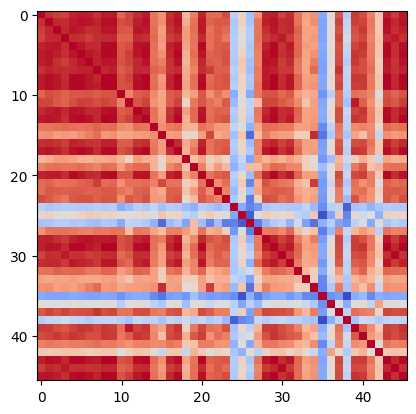

In [ ]:
#achando matriz de correlacao

correlation_matrix = df_normalized.corr(numeric_only=True)

plt.imshow(correlation_matrix, cmap='coolwarm')

#Achar colunas de correlação baixa


In [ ]:
#plotting 
small_df =filtered_df[['coordenada_x', 'coordenada_y', 'nome_bairro']]
small_df["nome_bairro"] =small_df["nome_bairro"].str.rstrip()
merged_df = pd.merge(small_df, clusters, on='nome_bairro', how='left')

merged_df =merged_df.dropna()

plt.figure(figsize=(10, 8))


labels = merged_df['labels'].unique()
for label in labels:
    subset = merged_df[merged_df['labels'] == label]
    plt.scatter(subset['coordenada_x'], subset['coordenada_y'], label=label,s=10)


plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('2D Plot of Coordenadas by Label')
plt.legend()
plt.show()

C:\Users\avela\AppData\Local\Temp\ipykernel_13800\3230189241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df["nome_bairro"] =small_df["nome_bairro"].str.rstrip()


KeyError: 'labels'

<Figure size 1000x800 with 0 Axes>